<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab04_pandas_gpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pandas y chat gpt

### Problema 1
1. a) Generar un diccionario con CHATGPT con los premios nobel de fisica de la decada que tu elijas.  El diccionario debe tener la siguiente estructura:

clave: Nombre del cientifico, el nombre del cientifico se debe llamar de la siguiente forma: Inicial del nombre del cientifico y Apellido, ejemplo: A. Einstein., R. Feyman.

Valor: diccionario con el año y el motivo por que el gano el premio nobel resumido maximo 10 palabras.


b). Con el diccionario construir un dataframe de pandas y almacenarlo como un archivo csv. Las columnas del data frame se deberán llamar Cientifico, AnoNobel, Motivo. 




In [30]:
import pandas as pd 
import numpy as np 
from datetime import datetime

In [31]:
premios_nobel = {
    'H. Alfvén': {
        'año':1970,'motivo': 'Investigaciones en la física del plasma y del espacio',
    },
    'L. Néel': {
        'año':1970,'motivo': 'Trabajo en la física del estado sólido',
    },
    'D. Gabor': {
        'año':1971,'motivo': 'Desarrollo del método holográfico',
    },
    'J. Bardeen': {
        'año':1972,'motivo': 'Desarrollo del transistor de efecto de campo',
      
    },
    'L. Esaki': {
        'año':1973,'motivo': 'Descubrimiento del efecto túnel en semiconductores',
    },
    'B. Josephson': {
        'año':1973,'motivo': 'Predicción teórica del efecto Josephson',
    },
    'M. Ryle': {
        'año':1974,'motivo': 'Pionero en la radioastronomía y la interferometría',
    },
    'A. Bohr': {
        'año':1975,'motivo': 'Contribución al conocimiento de la estructura nuclear',
    },
    'B. Mottelson': {
        'año':1975,'motivo': 'Contribución al conocimiento de la estructura nuclear',
    },
    'S. Ting': {
        'año':1976,'motivo': 'Descubrimiento de las partículas mediadoras W y Z',
    },
    'P. Anderson': {
        'año':1977,'motivo': 'Trabajo fundamental en la teoría de la materia condensada',
    },
    'P. Kapitsa': {
        'año':1978,'motivo': 'Desarrollo de técnicas para la investigación en baja temperatura',
    },
    'A. Penzias': {
        'año':1978,'motivo': 'Descubrimiento de la radiación cósmica de fondo',
    },
    'S. Weinberg': {
        'año':1979,'motivo': 'Contribución a la teoría de las fuerzas electromagnéticas y débiles',
    },
    'S. Glashow': {
        'año':1979,'motivo': 'Contribución a la teoría  de las fuerzas electromagnéticas y débiles',
    },
    'J. Cronin': {
        'año':1980,'motivo': 'Descubrimiento de la violación de la simetría CP',
    },
    'V. Fitch': {
        'año':1980,'motivo': 'Descubrimiento de la violación de la simetría CP',
    },
}

In [32]:
#b
df=pd.DataFrame(premios_nobel)
p=df.transpose().reset_index().copy()
p= p.rename(columns={'index': 'Científico','año': 'Año Nobel','motivo': 'Motivo'})

In [33]:
p.to_csv('p', sep=',', index=False)



### Problema 2.

Usando el dataset `PS4_1.csv`, convertir la serie `Date` en el indice (serie de tiempo) y eliminar la serie `Unnamed: 1` (generado por pandas), retornar un  diccionario con en el siguiente orden:

* cantidad de columnas
* Nombre de las columnas
* número de registros no NaN de cada columna
* cantidad total de memoria usada para cargar el dataset en el computador ,( df.memory_usage() )
* Estadistica basica para cada columna, media, desviacion estandar, maximo
* Remplazar los NaN por None









In [34]:
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vQOPWhAeS7Wa-AbenM2eeMsU5P8IEFvvkEAUr-JOa0iKcacj8zngV_pGy9sqGk1kQ/pub?output=xlsx"

In [35]:
df=pd.read_excel(url)

for d in df.Date:
    if(type(d)==str):
        df["Date_"] = datetime.strptime(d, "%d/%m/%Y")
    else:
        df["Date_"]=d
df=df.set_index("Date_")

In [36]:
df=df.drop(columns=["Date","Unnamed: 1"])#para eliminar la columnas

In [37]:
df

,Berri1,Maisonneuve_1,Maisonneuve_2,Brebeuf
Date_,,,,
2009-12-31,29.0,20.0,35.0,NaN
2009-12-31,19.0,3.0,22.0,NaN
2009-12-31,24.0,12.0,22.0,NaN
2009-12-31,24.0,8.0,15.0,NaN
2009-12-31,120.0,111.0,141.0,NaN
...,...,...,...,...
2009-12-31,66.0,29.0,52.0,0.0
2009-12-31,61.0,41.0,99.0,0.0
2009-12-31,89.0,52.0,115.0,0.0


In [12]:
columns=df.shape[1]
nombres_columnas = df.columns.tolist()
num_registros_no_nulos = df.count()
mem=df.memory_usage()
estadisticas_basicas = df.describe()
df = df.replace(np.nan, None)


In [13]:
Diccionario={"Cantidad de columnas":columns,
             "Nombre de las columnas":nombres_columnas ,
             "Número de registros no NaN":num_registros_no_nulos,
             "Memoria usada":mem,
             "Estadísticas":estadisticas_basicas,
             "Reemplazar NaN por None":df }

In [ ]:
Diccionario



### Problema 3

Realizar la lectura del data frame "Crimes_-_2019.csv" asociado a los crimenes que se presentaron en Chicago en el 2019. 


1. Ver la estadistica general del data frame.
2. Elimnar  las columnas PrimaryType, y Date.
3. Transformar la columna Date que es tipo string en una tipo Fecha, use el siguiente metodo de pandas pd.to_datetime(df.Date,format="%m/%d/%Y %I:%M:%S %p")
4. Mostrar los casos totales para cada tipo de crimen de forma ascendente, emplee:
   df.groupby(columna).Date.count()
   
   sort_values()
5. Ordenar los valores por orden alfabetico de Primary type
6. Mostrar de la fila 100 a la 120
6. Realizar una visualización de los datos anteriores.Emplee la libreria  seaborn con un grafico tipo barplot. Ej.
   ax = sns.barplot(x = "contador", y="Primary Type", data = datos)

In [38]:
url1="https://docs.google.com/spreadsheets/d/e/2PACX-1vRvINBhe9go73626D1Bz6cH6uGNEEiiQzhwLuIUEx6RLdLcHH-MtNh2buzdg_XFgkWhiZlb6Af8nSzp/pub?output=xlsx"
dtf=pd.read_excel(url1)


In [39]:
#Estadística General del Dataframe 
statistics=dtf.describe();statistics

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,5.040100e+04,50401.000000,50401.000000,50401.000000,50401.000000,5.020100e+04,5.020100e+04,50401.0,5.020100e+04,5.020100e+04
mean,1.162834e+07,1133.670542,11.108530,23.298764,36.573461,1.165086e+06,1.886367e+06,2019.0,3.797633e+09,-7.984010e+09
std,1.531569e+05,697.737805,6.967977,13.895214,21.277600,1.604124e+04,3.096797e+04,0.0,1.150392e+09,2.374149e+09
min,2.456800e+04,111.000000,1.000000,1.000000,1.000000,1.098012e+06,1.813914e+06,2019.0,4.167780e+05,-8.791511e+09
25%,1.157392e+07,533.000000,5.000000,10.000000,23.000000,1.153206e+06,1.859276e+06,2019.0,4.175111e+09,-8.770798e+09
50%,1.159453e+07,1023.000000,10.000000,24.000000,32.000000,1.166927e+06,1.894060e+06,2019.0,4.184162e+09,-8.765499e+09
75%,1.161480e+07,1713.000000,17.000000,34.000000,53.000000,1.176526e+06,1.908116e+06,2019.0,4.189767e+09,-8.761843e+09
max,1.224939e+07,2535.000000,25.000000,50.000000,77.000000,1.205114e+06,1.951495e+06,2019.0,4.202254e+09,-8.768700e+04


In [40]:
#Mostrar los casos totales para cada tipo de crimen de forma ascendente
dtf.groupby(["Primary Type"]).Date.count().sort_values(ascending=True)

Primary Type
NON-CRIMINAL                             1
HUMAN TRAFFICKING                        3
HOMICIDE                                 7
OBSCENITY                                8
GAMBLING                                11
KIDNAPPING                              32
CONCEALED CARRY LICENSE VIOLATION       34
CRIMINAL SEXUAL ASSAULT                 36
INTIMIDATION                            38
LIQUOR LAW VIOLATION                    42
STALKING                                51
ARSON                                   70
PROSTITUTION                           131
SEX OFFENSE                            197
CRIM SEXUAL ASSAULT                    205
INTERFERENCE WITH PUBLIC OFFICER       288
PUBLIC PEACE VIOLATION                 297
OFFENSE INVOLVING CHILDREN             420
WEAPONS VIOLATION                     1171
CRIMINAL TRESPASS                     1425
ROBBERY                               1596
MOTOR VEHICLE THEFT                   1836
BURGLARY                              194

In [42]:
#Ordenar los valores por orden alfabetico de Primary type
dtf=dtf.sort_values("Primary Type")

In [43]:
#Mostrar de la fila 100 a la 120
filas=dtf.iloc[100:121];filas

,ID,Case Number,Block,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
26577,11585792.0,JC140314,081XX S COTTAGE GROVE AVE,2019-04-02 18:40:00,051A,ASSAULT,AGGRAVATED: HANDGUN,STREET,False,False,...,8.0,44.0,04A,1182974.0,1851151.0,2019.0,2/21/2019 16:06,4.174676e+09,-8.760511e+09,"(41.746759188, -87.605109535)"
24917,11583163.0,JC137242,053XX N LOWELL AVE,2019-01-02 16:30:00,560.0,ASSAULT,SIMPLE,RESIDENCE-GARAGE,False,False,...,39.0,13.0,08A,1146401.0,1935370.0,2019.0,2019-08-02 16:14:00,4.197864e+09,-8.773698e+09,"(41.978637926, -87.736979831)"
39455,11604873.0,JC163166,044XX S COTTAGE GROVE AVE,2/23/2019 14:15,530.0,ASSAULT,AGGRAVATED: OTHER DANG WEAPON,SMALL RETAIL STORE,False,False,...,4.0,39.0,04A,1182339.0,1875765.0,2019.0,2019-02-03 16:09:00,4.181432e+09,-8.760667e+09,"(41.814317008, -87.606674143)"
48859,11619971.0,JC181625,046XX S FRANCISCO AVE,2019-11-03 15:30:00,520.0,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,True,False,...,15.0,58.0,04A,1157815.0,1873744.0,2019.0,3/28/2019 15:59,4.180930e+09,-8.769669e+09,"(41.80930497, -87.69668587)"
24911,11583153.0,JC133266,064XX S MOZART ST,1/29/2019 7:50,530.0,ASSAULT,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,...,17.0,66.0,04A,1158484.0,1861911.0,2019.0,2019-06-02 16:03:00,4.177682e+09,-8.769455e+09,"(41.776819976, -87.694554571)"
1554,11862020.0,JC474121,006XX N LAMON AVE,10/15/2019 20:20,560.0,ASSAULT,SIMPLE,APARTMENT,False,True,...,37.0,25.0,08A,1143572.0,1903977.0,2019.0,10/22/2019 16:09,4.189255e+09,-8.774817e+09,"(41.892546106, -87.748171713)"
10165,11558964.0,JC107615,030XX W CARROLL AVE,2019-07-01 08:00:00,530.0,ASSAULT,AGGRAVATED: OTHER DANG WEAPON,STREET,False,True,...,27.0,27.0,04A,1156114.0,1902253.0,2019.0,1/18/2019 9:37,4.188757e+09,-8.770216e+09,"(41.887571335, -87.702156331)"
9338,11557706.0,JC106124,017XX W GRAND AVE,2019-05-01 18:57:00,560.0,ASSAULT,SIMPLE,RESTAURANT,True,False,...,1.0,24.0,08A,1164467.0,1903534.0,2019.0,1/18/2019 9:37,4.189091e+09,-8.767145e+09,"(41.890913805, -87.671445268)"
22030,11578375.0,JC131117,012XX S LAWNDALE AVE,1/27/2019 3:18,520.0,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,APARTMENT,True,True,...,24.0,29.0,04A,1151904.0,1894143.0,2019.0,2019-03-02 16:01:00,4.186540e+09,-8.771783e+09,"(41.865400546, -87.71783042)"
24895,11583131.0,JC136743,044XX S FAIRFIELD AVE,2019-01-02 16:25:00,051A,ASSAULT,AGGRAVATED: HANDGUN,ALLEY,False,False,...,15.0,58.0,04A,1158778.0,1875031.0,2019.0,2019-08-02 16:14:00,4.181282e+09,-8.769312e+09,"(41.812817031, -87.693118571)"


In [44]:
dtf

,ID,Case Number,Block,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
18138,11572064.0,JC123114,052XX S SACRAMENTO AVE,1/20/2019 0:20,1020.0,ARSON,BY FIRE,VEHICLE NON-COMMERCIAL,False,False,...,14.0,63.0,9.0,1157266.0,1869704.0,2019.0,3/26/2019 16:07,4.179823e+09,-8.769881e+09,"(41.798229812, -87.698808911)"
10732,11559940.0,JC107465,064XX S LAWLER AVE,2019-07-01 01:34:00,1020.0,ARSON,BY FIRE,DRIVEWAY - RESIDENTIAL,False,False,...,13.0,64.0,9.0,1143902.0,1861544.0,2019.0,1/18/2019 9:37,4.177610e+09,-8.774802e+09,"(41.77609766, -87.748021618)"
19108,11869433.0,JC482922,076XX S KINGSTON AVE,10/22/2019 23:30,1025.0,ARSON,AGGRAVATED,APARTMENT,False,False,...,7.0,43.0,9.0,1194519.0,1854810.0,2019.0,10/29/2019 15:51,4.175652e+09,-8.756269e+08,"(41.756523865, -87.562686396)"
27812,11587749.0,JC142452,053XX W WASHINGTON BLVD,2019-06-02 14:53:00,1020.0,ARSON,BY FIRE,RESIDENCE-GARAGE,False,False,...,28.0,25.0,9.0,1140524.0,1900229.0,2019.0,2/15/2019 16:04,4.188232e+09,-8.775946e+09,"(41.882317624, -87.759457988)"
26782,11586078.0,JC140674,021XX N CAMPBELL AVE,2019-05-02 05:16:00,1020.0,ARSON,BY FIRE,VEHICLE NON-COMMERCIAL,False,False,...,1.0,22.0,9.0,1159537.0,1914233.0,2019.0,2019-12-02 16:09:00,4.192038e+09,-8.768926e+09,"(41.920375644, -87.689255676)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15805,11568337.0,JC118591,071XX S INDIANA AVE,1/16/2019 4:27,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,...,6.0,69.0,15.0,1178838.0,1857746.0,2019.0,1/23/2019 11:26,4.176495e+09,-8.762006e+08,"(41.764951664, -87.620064404)"
8255,11555964.0,JC103980,071XX S JEFFERY BLVD,2019-04-01 03:52:00,1477.0,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,...,5.0,43.0,15.0,1190776.0,1858184.0,2019.0,1/18/2019 9:37,4.176587e+09,-8.757629e+09,"(41.76587359, -87.576294705)"
37041,11601045.0,JC158763,057XX S MICHIGAN AVE,2/19/2019 19:48,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,...,20.0,40.0,15.0,1178134.0,1867092.0,2019.0,2/26/2019 16:14,4.179061e+09,-8.762236e+09,"(41.790614044, -87.622361533)"
29370,11965473.0,JC354045,089XX S EMERALD AVE,7/18/2019 9:34,143B,WEAPONS VIOLATION,UNLAWFUL POSSESSION - OTHER FIREARM,VEHICLE NON-COMMERCIAL,False,False,...,21.0,71.0,15.0,1172875.0,1845581.0,2019.0,8/19/2020 15:49,4.173170e+09,-8.764228e+09,"(41.731702947, -87.642278533)"


In [45]:
dtf.index

Int64Index([18138, 10732, 19108, 27812, 26782, 12637, 14195,  1832, 41290,
            19072,
            ...
            33185, 24307, 46872, 12584, 43726, 15805,  8255, 37041, 29370,
             1236],
           dtype='int64', length=50401)

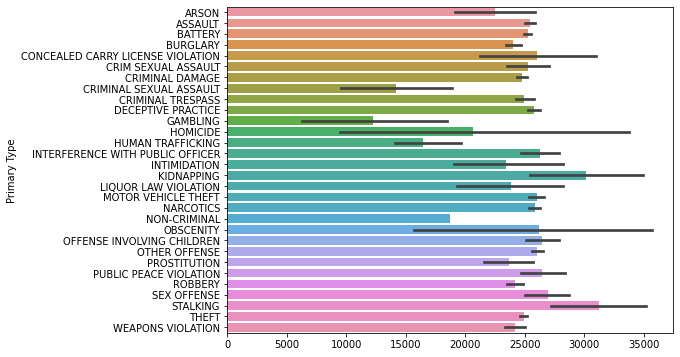

In [46]:
#Realizar una visualización de los datos anteriores.Emplee la libreria  seaborn con un grafico tipo barplot. Ej.
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x=dtf.index, y="Primary Type", data = dtf)

In [47]:
#Elimnar las columnas PrimaryType, y Date.
dtf=dtf.drop(columns=["Primary Type","Date"])


### Problema 4

1. Leer el dataset country_vaccinations.csv  y filtrar los datos para Colombia
2. Crear un csv con los datos para colombia
3. Realizar una comparacion con los paises latinoamericanos de la cantidad de vacunados.
4. A traves de mascaras determinar el numero de vacunados en el intervalo  [1.5E6, 2.0E6]




Referencias: Puedes consultar la pagina kaggle para estudiar mas acerca de pandas

In [48]:
csv="https://docs.google.com/spreadsheets/d/e/2PACX-1vQr0C-EQAnT_itg8GBC2W5LeRhHQnjr_5PINRp2y1tw7kwX9rD2zsrkBswpcdYiNn6j6i2zX3D-8MTQ/pub?output=csv"

In [49]:
DF=pd.read_csv(csv)

In [ ]:
filtroC = DF.loc[DF['country'] == 'Colombia']
filtroC.to_csv('Datos_colombia.csv', index=False)
filtroC

In [55]:
DF

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9571,Zimbabwe,ZWE,2021-03-29,81610.0,69751.0,11859.0,2471.0,5434.0,0.55,0.47,0.08,366.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378053949...
9572,Zimbabwe,ZWE,2021-03-30,85866.0,72944.0,12922.0,4256.0,5810.0,0.58,0.49,0.09,391.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378053949...
9573,Zimbabwe,ZWE,2021-03-31,91880.0,76995.0,14885.0,6014.0,5712.0,0.62,0.52,0.10,384.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378053949...
9574,Zimbabwe,ZWE,2021-04-01,105307.0,87791.0,17516.0,13427.0,6617.0,0.71,0.59,0.12,445.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378053949...


In [56]:
#Realizar una comparacion con los paises latinoamericanos de la cantidad de vacunados.
latam_paises = ['Argentina', 'Bolivia', 'Brasil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominica', 'Ecuador', 'El Salvador', 'Granada', 'Guatemala', 'Guyana', 'Haití', 'Honduras', 'Jamaica', 'México', 'Nicaragua', 'Panamá', 'Paraguay', 'Perú', 'Puerto Rico', 'República Dominicana', 'San Cristóbal y Nieves', 'San Vicente y las Granadinas', 'Santa Lucía', 'Surinam', 'Trinidad y Tobago', 'Uruguay', 'Venezuela']
latam_data = DF[DF["country"].isin(latam_paises)]

In [57]:
vac_by_country = latam_data.groupby(["country"])["people_vaccinated"].sum().sort_values(ascending=False)
vac_by_country

country
Chile          235239384.0
Argentina       85033946.0
Colombia        27906580.0
Uruguay         10389390.0
Bolivia          3991965.0
Ecuador          1945600.0
Guatemala        1660173.0
Costa Rica       1581082.0
Paraguay          485329.0
El Salvador       463843.0
Honduras          118744.0
Jamaica            61195.0
Guyana             50758.0
Dominica           36825.0
Venezuela          26574.0
Name: people_vaccinated, dtype: float64

In [58]:
#A traves de mascaras determinar el numero de vacunados en el intervalo [1.5E6, 2.0E6]
mascara = (DF["people_vaccinated"] >= 1.5E6) & (DF ["people_vaccinated"] <= 2.0E6)
datos_filtrados = DF.loc[mascara]
total_vacunados = datos_filtrados["people_vaccinated"].sum()
print("El número de personas vacunadas en el intervalo [1.5E6, 2.0E6] es:", total_vacunados)


El número de personas vacunadas en el intervalo [1.5E6, 2.0E6] es: 246511460.0
